# **Modelling and Evaluation**

## Objectives

* Answer business requirement 2:
    * The client is interested in being able to tell if a given image is a vehicle or not.

## Inputs

* The image shape embeddings from the pickle file.
* The images are taken from the subfolders of test, train and validation folders.

* ── inputs
* 		└──vehicle_dataset
* 		      └──vehicle
* 					├── test
* 					│	├── non-vehicles
* 					│	└── vehicles
* 					├── train
* 					│	├── non-vehicles
* 					│	└── vehicles
* 					└── validation
* 							├── non-vehicles
* 							└── vehicles

## Outputs


## Additional Comments



---

# Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import plotly.express as px
sns.set_style("white")
from matplotlib.image import imread


---

# Change Working Directory

Change the working directory from its current folder to its parent folder

* We access the current directory with os.getcwd()

In [2]:
current_dir = os.getcwd()
current_dir

'/workspaces/CI_PP5_VD/jupyter_notebooks'

We want to make the parent of the current directory the new current directory

* os.path.dirname() gets the parent directory
* os.chdir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/CI_PP5_VD'

## Set Input Directories

Set train, validation and test paths.

In [5]:
my_data_dir = 'inputs/vehicle-detection-image-set/data'
train_path = my_data_dir + '/train' 
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set Output Directory

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set Labels

In [7]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['non-vehicles', 'vehicles']


## Set Image Shape

In [8]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(64, 64, 3)

---

# Image Distribution

## Count Number of Images per Label and Set

In [9]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Count': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")

* train - non-vehicles: 6277 images
* train - vehicles: 6154 images
* validation - non-vehicles: 896 images
* validation - vehicles: 879 images
* test - non-vehicles: 1795 images
* test - vehicles: 1759 images




## Pie Chart of Set Distribution

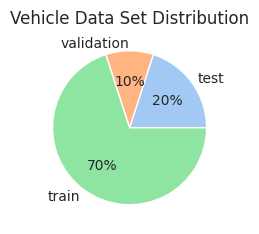

In [10]:
folders = os.listdir(my_data_dir)
data=[]
for folder in folders:
    for label in labels:
        n=int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))
        n+=n
    data.append(n)

px = 1/plt.rcParams['figure.dpi'] 
plt.subplots(figsize=(800*px, 250*px))
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = folders, colors = colors, autopct='%.0f%%')
plt.title('Vehicle Data Set Distribution')
plt.savefig(f'{file_path}/sets_distribution_pie.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

# Image Data Augmentation

## Import ImageDataGenerator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Initialize ImageDataGenerator


In [12]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )